In [1]:
from sympy import *
from matplotlib import pyplot as plt
import numpy as np

In [5]:
Q1, Q2,mc1,mc2, a, b=symbols('Q1 Q2 mc1 mc2 a b')

def P_demand(Q,a,b):
    return a-b*Q

def profit(Q1,Q2,mc,a,b):
    return (P_demand(Q1+Q2,a,b)-mc)*Q1

Marginalinntekt:

In [6]:
d_profit1_Q=diff(profit(Q1,Q2,mc1,a,b),Q1)
d_profit2_Q=diff(profit(Q2,Q1,mc2,a,b),Q2)

display(d_profit1_Q)
display(d_profit2_Q)

-Q1*b + a - b*(Q1 + Q2) - mc1

-Q2*b + a - b*(Q1 + Q2) - mc2

Førsteordensbetingelse:

In [7]:
foc1=Eq(d_profit1_Q,0)
foc2=Eq(d_profit2_Q,0)

display(foc1)
display(foc2)

Eq(-Q1*b + a - b*(Q1 + Q2) - mc1, 0)

Eq(-Q2*b + a - b*(Q1 + Q2) - mc2, 0)

Løser:

In [13]:
sol=solve([foc1,foc2],[Q1,Q2])

display(sol[Q1])
display(sol[Q2])

(a - 2*mc1 + mc2)/(3*b)

(a + mc1 - 2*mc2)/(3*b)

Løsningsfunksjon:

In [71]:
cournot=lambdify(
    (a,b,mc1,mc2), 
    (sol[Q1],sol[Q2])
)

Responskurver:

In [82]:
R1=solve(foc1,Q1)
R2=solve(foc2,Q1)

R1=lambdify(
    (Q2,a,b,mc1), 
    R1[0]
)

R2=lambdify(
    (Q2,a,b,mc2), 
    R2[0]
)

display(R1(Q1,a,b,mc1))
display(R2(Q1,a,b,mc1))

(-0.5*Q1*b + 0.5*a - 0.5*mc1)/b

(-2*Q1*b + a - mc1)/b

Plotter

Definerer parametrene i modellen

In [76]:
q = np.linspace(1,600,100)
a_verdi=2000
b_verdi=4
mc1_verdi=500
mc2_verdi=25

Plotter:

Løsningen er at 
bedrift 1 produserer 85.41666666666666 og 
bedrift 2 produserer 85.41666666666666 
prisen blir 841.6666666666667


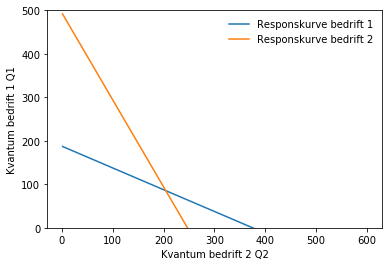

In [81]:


fig,ax=plt.subplots()
ax.set_ylabel('Kvantum bedrift 1 Q1')
ax.set_xlabel('Kvantum bedrift 2 Q2')


#drawing respons curves
ax.plot(q,
        R1(q,a_verdi,b_verdi,mc1_verdi),
        label='Responskurve bedrift 1'
       )

ax.plot(q,
        R2(q,a_verdi,b_verdi,mc2_verdi),
        label='Responskurve bedrift 2'
       )

#setting range for y-axis. 
plt.ylim((0,500))

#adding legend:
ax.legend(loc='upper right',frameon=False)

Q1sol, Q2sol=cournot(a_verdi,b_verdi,mc1_verdi,mc2_verdi)

print(f"""Løsningen er at 
bedrift 1 produserer {Q1sol} og 
bedrift 2 produserer {Q1sol} 
prisen blir {P_demand(Q1sol+Q2sol,a_verdi,b_verdi)}""")